<a href="https://colab.research.google.com/github/namitasaurus/Indian_Summer_Prediction/blob/main/Indian_Summers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Algorithm used: Auto Regressive Integrated Moving Average models (ARIMA)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
data = pd.read_csv('summers.csv')
df = pd.DataFrame(data)
data

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,2021-04-01 06:11:12,2021-04-01 18:39:13,0.6,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 06:08:55,2021-04-03 18:40:19,0.7,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 06:07:47,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 06:06:39,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15498,Hyderabad,2012-06-26,32.1,22.1,25.8,35.9,22.1,26.7,19.9,71.60,31.3,248.8,NaN,85.3,4.6,2012-06-26 05:44:05,2012-06-26 18:53:55,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...
15499,Hyderabad,2012-06-27,31.8,21.1,25.5,33.3,21.1,26.1,19,68.40,29.5,262.4,NaN,67.9,5.5,2012-06-27 05:44:21,2012-06-27 18:54:04,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
15500,Hyderabad,2012-06-28,31.8,23.1,26.8,33.3,23.1,27.6,19.1,63.67,31.3,264.5,NaN,69.5,5.6,2012-06-28 05:44:37,2012-06-28 18:54:12,0.33,Partially cloudy,Partly cloudy throughout the day.
15501,Hyderabad,2012-06-29,32.8,23.1,26.7,35.1,23.1,27.5,19.5,65.54,27.7,265.1,NaN,85.0,5.6,2012-06-29 05:44:54,2012-06-29 18:54:19,0.38,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...


In [ ]:
data.columns
#to tell us what the parameters are

Index(['City', 'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description'],
      dtype='object')

In [ ]:
data.isnull().sum()

City                   0
Date                   0
tempmax               70
tempmin               70
temp                  90
feelslikemax          71
feelslikemin          71
feelslike             91
dew                   90
humidity              91
windspeed             91
winddir              101
sealevelpressure    3795
cloudcover            91
visibility            91
sunrise                1
sunset                 1
moonphase              1
conditions            91
description           92
dtype: int64

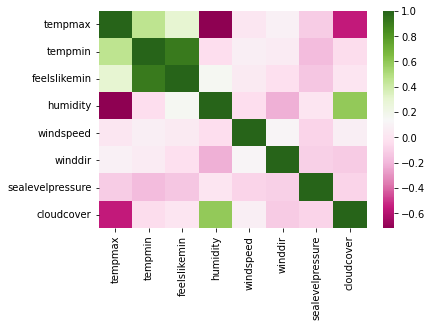

In [ ]:
data_copy = data.copy()
del data_copy['Date']
del data_copy['City']
corr = data_copy.corr()
sns.heatmap(corr, cmap='PiYG')

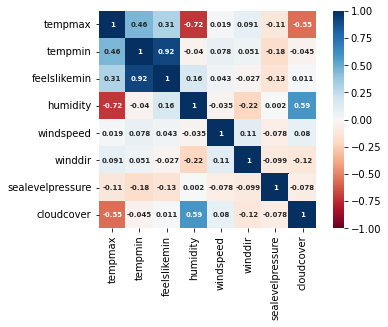

In [ ]:
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':9, 'fontweight':'bold'},
           square=True)

In [ ]:
df.drop("description",axis=1,inplace=True)
df.drop("conditions",axis=1,inplace=True)
df.drop("sunrise",axis=1,inplace=True)
df.drop("sunset",axis=1,inplace=True)
df.drop("visibility",axis=1,inplace=True)